# 1 전처리 파일 Read

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df_adult = pd.read_csv('adult.csv')
df_child = pd.read_csv('child.csv')
df_fam = pd.read_csv('family.csv')

In [24]:
adult_col_org_text = '''DIBEV1
AGE_P
SEX
AHEIGHT
AWEIGHTP
PREGFLYR
PREGNOW
AHCPLROU
CHLEV
HYPEV
HYPMED2
HYPMDEV2
INSLN1
AFLHC24_
AINTIL2W
ALCSTAT
SMKSTAT2
CIGAREV2
ECIGEV2
PIPEV2
SMKEV
SMKLSTB1
EPHEV
HISPAN_I
MRACBPI2
MRACRPI2
ASPMDMED
ASPMEDAD
ASPMEDEV
ASPONOWN
REGION
TIRED_1
ARTH1'''

In [25]:
adult_col_new_text = '''DIBEV1
AGE
GENDER
HEIGHT
WEIGHT
PREGFLYR
PREGNOW
CPLROU
CHLEV
HYPEV
HYPMED2
HYPMDEV2
INSLN1
AFLHC24_
INTIL2W
ALCSTAT
SMKSTAT2
CIGAREV2
ECIGEV2
PIPEV2
SMKEV
SMKLSTB1
EPHEV
HISPAN_I
MRACBPI2
MRACRPI2
ASPMDMED
ASPMEDAD
ASPMEDEV
ASPONOWN
REGION
TIRED_1
ARTH1'''

In [26]:
adult_org_col_list = adult_col_org_text.split('\n')
adult_new_col_list = adult_col_new_text.split('\n')

In [27]:
col_map = {}
for org_col,new_col in zip(adult_org_col_list,adult_new_col_list):
    col_map[org_col] = new_col

In [28]:
col_map

{'DIBEV1': 'DIBEV1',
 'AGE_P': 'AGE',
 'SEX': 'GENDER',
 'AHEIGHT': 'HEIGHT',
 'AWEIGHTP': 'WEIGHT',
 'PREGFLYR': 'PREGFLYR',
 'PREGNOW': 'PREGNOW',
 'AHCPLROU': 'CPLROU',
 'CHLEV': 'CHLEV',
 'HYPEV': 'HYPEV',
 'HYPMED2': 'HYPMED2',
 'HYPMDEV2': 'HYPMDEV2',
 'INSLN1': 'INSLN1',
 'AFLHC24_': 'AFLHC24_',
 'AINTIL2W': 'INTIL2W',
 'ALCSTAT': 'ALCSTAT',
 'SMKSTAT2': 'SMKSTAT2',
 'CIGAREV2': 'CIGAREV2',
 'ECIGEV2': 'ECIGEV2',
 'PIPEV2': 'PIPEV2',
 'SMKEV': 'SMKEV',
 'SMKLSTB1': 'SMKLSTB1',
 'EPHEV': 'EPHEV',
 'HISPAN_I': 'HISPAN_I',
 'MRACBPI2': 'MRACBPI2',
 'MRACRPI2': 'MRACRPI2',
 'ASPMDMED': 'ASPMDMED',
 'ASPMEDAD': 'ASPMEDAD',
 'ASPMEDEV': 'ASPMEDEV',
 'ASPONOWN': 'ASPONOWN',
 'REGION': 'REGION',
 'TIRED_1': 'TIRED_1',
 'ARTH1': 'ARTH1'}

In [29]:
df_adult.rename(columns=col_map)

,HHX,FMX,DIBEV1,AGE,GENDER,HEIGHT,WEIGHT,PREGFLYR,PREGNOW,CPLROU,...,MRACBPI2,MRACRPI2,ASPMDMED,ASPMEDAD,ASPMEDEV,ASPONOWN,REGION,TIRED_1,ARTH1,BMI
0,1,1,1,79,2,62,129,NaN,NaN,1.0,...,1,1,NaN,1.0,1.0,NaN,3,1,1,2358
1,6,1,2,37,1,71,235,NaN,NaN,2.0,...,1,1,NaN,NaN,NaN,NaN,3,2,2,3279
2,8,1,2,29,1,96,996,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,4363
3,9,1,2,75,1,66,138,NaN,NaN,1.0,...,7,11,NaN,1.0,1.0,NaN,3,2,1,2229
4,10,1,2,39,1,71,170,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,1,1,2,2372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25412,55556,3,2,19,2,63,118,2.0,2.0,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,2090
25413,55557,1,2,49,2,66,170,2.0,2.0,1.0,...,2,2,NaN,NaN,2.0,2.0,3,8,1,2745
25414,55560,1,2,40,2,68,170,2.0,2.0,1.0,...,1,1,NaN,NaN,2.0,2.0,3,4,1,2585
25415,55562,1,2,61,2,65,160,NaN,NaN,1.0,...,1,1,NaN,NaN,2.0,2.0,2,2,2,2663


# 2 전처리용 Feature(Columns 이후 Feature) Neme 통일된 파일 Read

In [30]:
# 위의 방식으로 csv 저장했다~
# 각 파일 불러오기

new_fam = pd.read_csv('family_newcol.csv')
new_adult = pd.read_csv('adult_newcol.csv')
new_child = pd.read_csv('child_newcol.csv')

## 2.1 데이터 통합(mgerge)를 위한 id생성

In [31]:
# key컬럼들을 사용하여 id컬럼 생성
new_fam['id'] = '1000' + new_fam['HHX'].astype('str') + new_fam['FMX'].astype('str')
new_adult['id'] = '1000' + new_adult['HHX'].astype('str') + new_adult['FMX'].astype('str')
new_child['id'] = '1000' + new_child['HHX'].astype('str') + new_child['FMX'].astype('str')
# 'HHX','FMX' 제거
new_fam.drop(['HHX','FMX'],inplace=True,axis=1)
new_adult.drop(['HHX','FMX'],inplace=True,axis=1)
new_child.drop(['HHX','FMX'],inplace=True,axis=1)
# # 불필요한 컬럼 제거
# new_adult = new_adult.drop('Unnamed: 0',axis=1)
# new_child = new_child.drop('Unnamed: 0',axis=1)

## 2.2 데이터 Merge & 통합 option(combine_first)

In [32]:
# family 데이터프레임에 adult 데이터 프레임 merge
temp = pd.merge(new_fam,new_adult,how='left',on='id')
# combine_first() 를 이용해 병합
temp_2 = temp.combine_first(new_child)

- child의 키와 몸무게에 대다수가 결측치
- 그러면 어떻게 채울까? 너무 어린 나이는 필요없다고 판단하여 12세 이상부터만 가져올 것
- Adult의 HYPMDEV2는 당뇨약 복용 유무로써 nan값은 no로 대치하는 것이 나을 듯 함 yes(1)만 남기고 나머지는 전부 no(2 or 0)으로 처리
- Adult의 INSLN1 결측치 다수 존재 - 당뇨병과 너무 결과론적인 데이터? --> 사용하지 않는것이 맞을 듯 함
- Adult의 AFLH24_ 하위에 2주간 구토/설사 동반한 위문제 컬럼이 있으므로, 사용하지 않아도 될 듯
- AINTIL2W,CINTIL2W - 구토/ 설사 동반 위 문제 컬럼으로 사용.
- Adult의 EPHEV는 폐기종으로 당뇨병과 합병증으로 자주 발생하는 병 / 사용.
- MRACBPI2,MRACRPI2 인종 관련된 컬럼으로 사용해도 무방할 듯 --> 미국내에서 아시아인이 당뇨병 환자 2순위
- REGION : 지역간 식이 차이에 따라서도 당뇨병 발병 차이가 있음 pd.crosstab(df_adult['REGION'],df_adult['DIBEV1'])
- 아스피린 관련은 결측치가 너무 많으므로 제외

### 2.2.1) 전처리 :  hild 12세 이상

In [33]:
# child 12세 이상
temp_2 = temp_2[temp_2['AGE'] >= 12]

### 2.2.2) 전처리 : HYPMDEV2(고혈압) yes(1) 外 no(2 or 0)

In [34]:
# yes(1)만 남기고 나머지는 전부 no(2 or 0)으로 처리
temp_2['HYPMDEV2'] = temp_2['HYPMDEV2'].apply(lambda x: x if x == 1.0 else 2)

### 2.2.3) 전처리 : 아스피린 Feature 제거

In [35]:
# 아스피린 컬럼 제거
temp_2 = temp_2.drop(['INSLN1','AFLHC24_','ASPMDMED','ASPMEDAD','ASPMEDEV','ASPONOWN'],axis=1)

In [36]:
temp_2

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,ECIGEV2,EPHEV,...,PIPEV2,PREGFLYR,PREGNOW,REGION,SMKEV,SMKLSTB1,SMKSTAT2,TIRED_1,WEIGHT,id
0,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,NaN,NaN,3.0,1.0,2.0,3.0,1.0,129.0,100011
2,37.0,7.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,3.0,2.0,2.0,4.0,2.0,235.0,100061
3,29.0,6.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,NaN,NaN,2.0,2.0,2.0,4.0,2.0,996.0,100081
4,75.0,3.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,NaN,NaN,3.0,1.0,2.0,3.0,2.0,138.0,100091
5,39.0,6.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,2.0,2.0,4.0,1.0,170.0,1000101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,118.0,1000555563
30305,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,4.0,8.0,170.0,1000555571
30306,40.0,3.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,170.0,1000555601
30307,61.0,5.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,2.0,2.0,2.0,4.0,2.0,160.0,1000555621


In [37]:
# csv파일로 저장
# temp_2.to_csv('temp.csv', index=False)

In [38]:
# pd.crosstab(temp_2['REGION'],temp_2['DIBEV1'])

In [39]:
# pd.crosstab(temp_2['MRACBPI2'],temp_2['DIBEV1'])

In [40]:
# pd.crosstab(temp_2['MRACRPI2'],temp_2['DIBEV1'])

## 2.3 결측치 처리

In [41]:
temp_2.notnull().sum()

AGE         25906
ALCSTAT     25417
ARTH1       25906
BMI         25906
CHLEV       25417
CIGAREV2    25417
CPLROU      23311
DIBEV1      25906
ECIGEV2     25417
EPHEV       25417
FSBALANC    25906
GENDER      25906
HEIGHT      25906
HISPAN_I    25906
HYPEV       25417
HYPMDEV2    25906
HYPMED2      8227
INTIL2W     25906
MRACBPI2    25906
MRACRPI2    25906
PIPEV2      25417
PREGFLYR     6003
PREGNOW      6117
REGION      25906
SMKEV       25417
SMKLSTB1    25417
SMKSTAT2    25417
TIRED_1     25417
WEIGHT      25906
id          25906
dtype: int64

### 2.3.1) 결측치 : 결측 Feature 목록화 및 처리
- ['ALCSTAT','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMED2','SMKSTAT2','TIRED_1']

In [42]:
temp_2['ALCSTAT'] = temp_2['ALCSTAT'].apply(lambda x: x if x == 1.0 else 2)

In [43]:
### 2.3.1) 결측치 : ALCSTAT(음주현황)

In [44]:
temp_list = ['ALCSTAT','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMED2','SMKSTAT2','TIRED_1']

In [45]:
for i in temp_list:
    temp_2[i] = temp_2[i].apply(lambda x: x if x == 1.0 else 2)

In [46]:
temp_2.isnull().sum()

AGE             0
ALCSTAT         0
ARTH1           0
BMI             0
CHLEV           0
CIGAREV2        0
CPLROU          0
DIBEV1          0
ECIGEV2       489
EPHEV           0
FSBALANC        0
GENDER          0
HEIGHT          0
HISPAN_I        0
HYPEV           0
HYPMDEV2        0
HYPMED2         0
INTIL2W         0
MRACBPI2        0
MRACRPI2        0
PIPEV2        489
PREGFLYR    19903
PREGNOW     19789
REGION          0
SMKEV         489
SMKLSTB1      489
SMKSTAT2        0
TIRED_1         0
WEIGHT          0
id              0
dtype: int64

### 2.3.2) 결측치 : GENDER(성별)

In [47]:
# 18세 이상 49세 이하는 응답, 그 외는 NaN
temp_2.loc[temp_2['GENDER']==2.0,['AGE','GENDER','PREGNOW','PREGFLYR']]

,AGE,GENDER,PREGNOW,PREGFLYR
0,79.0,2.0,NaN,NaN
6,54.0,2.0,NaN,NaN
9,28.0,2.0,2.0,2.0
13,67.0,2.0,NaN,NaN
19,44.0,2.0,2.0,2.0
...,...,...,...,...
30304,19.0,2.0,2.0,2.0
30305,49.0,2.0,2.0,2.0
30306,40.0,2.0,2.0,2.0
30307,61.0,2.0,NaN,NaN


### 2.3.3) 결측치 : PREGNOW(임신)

In [48]:
# 임신 관련 컬럼 2개 새로운 컬럼으로 합치기
temp_2['PREG'] = 1
temp_2.loc[(temp_2['PREGNOW'] == 2)&(temp_2['PREGFLYR'] == 2),'PREG'] = 2

In [49]:
temp_2

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,ECIGEV2,EPHEV,...,PREGFLYR,PREGNOW,REGION,SMKEV,SMKLSTB1,SMKSTAT2,TIRED_1,WEIGHT,id,PREG
0,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,2.0,...,NaN,NaN,3.0,1.0,2.0,2.0,1.0,129.0,100011,1
2,37.0,2.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,3.0,2.0,2.0,2.0,2.0,235.0,100061,1
3,29.0,2.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,2.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,996.0,100081,1
4,75.0,2.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,NaN,3.0,1.0,2.0,2.0,2.0,138.0,100091,1
5,39.0,2.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,1.0,2.0,2.0,2.0,1.0,170.0,1000101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,118.0,1000555563,2
30305,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,170.0,1000555571,2
30306,40.0,2.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,3.0,1.0,2.0,2.0,2.0,170.0,1000555601,2
30307,61.0,2.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,160.0,1000555621,1


### 2.3.4) 결측치 : 불필요 feature 제거
* ['ECIGEV2','PIPEV2','SMKEV','SMKLSTB1','PREGFLYR','PREGNOW']

In [50]:
# 나머지 필요없는 컬럼 제거
temp_2 = temp_2.drop(['ECIGEV2','PIPEV2','SMKEV','SMKLSTB1','PREGFLYR','PREGNOW'],axis=1)

In [51]:
temp_2.isnull().sum()

AGE         0
ALCSTAT     0
ARTH1       0
BMI         0
CHLEV       0
CIGAREV2    0
CPLROU      0
DIBEV1      0
EPHEV       0
FSBALANC    0
GENDER      0
HEIGHT      0
HISPAN_I    0
HYPEV       0
HYPMDEV2    0
HYPMED2     0
INTIL2W     0
MRACBPI2    0
MRACRPI2    0
REGION      0
SMKSTAT2    0
TIRED_1     0
WEIGHT      0
id          0
PREG        0
dtype: int64

In [52]:
# 'id' 컬럼 맨 앞으로 옮기기
column_id = temp_2.pop(temp_2.columns[-2])
temp_2.insert(0, column_id.name, column_id)

In [53]:
temp_2.shape

(25906, 25)

In [54]:
temp_2

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,EPHEV,...,HYPMDEV2,HYPMED2,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,WEIGHT,PREG
0,100011,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,129.0,1
2,100061,37.0,2.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,235.0,1
3,100081,29.0,2.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,996.0,1
4,100091,75.0,2.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,7.0,11.0,3.0,2.0,2.0,138.0,1
5,1000101,39.0,2.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,170.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,1000555563,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,118.0,2
30305,1000555571,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,170.0,2
30306,1000555601,40.0,2.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,170.0,2
30307,1000555621,61.0,2.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,160.0,1


In [55]:
temp_2.columns

Index(['id', 'AGE', 'ALCSTAT', 'ARTH1', 'BMI', 'CHLEV', 'CIGAREV2', 'CPLROU',
       'DIBEV1', 'EPHEV', 'FSBALANC', 'GENDER', 'HEIGHT', 'HISPAN_I', 'HYPEV',
       'HYPMDEV2', 'HYPMED2', 'INTIL2W', 'MRACBPI2', 'MRACRPI2', 'REGION',
       'SMKSTAT2', 'TIRED_1', 'WEIGHT', 'PREG'],
      dtype='object')

### 2.3.5) 전처리/결측치 : 키, 몸무게 이상값 제거

In [56]:
# 원본 키 인치 96~99는 지움
temp_2 = temp_2[(temp_2['HEIGHT'] < 96)]

In [57]:
# 원본 몸무게 파운드 996~999는 지울 것
temp_2 = temp_2[(temp_2['WEIGHT'] < 996)]

### 2.3.6) 결측치 : BMI ← 계산을 위헤 단위변경[키(인치→cm), 몸무게(파운드→ kg)]

In [58]:
temp_2['HEIGHT(cm)'] = temp_2['HEIGHT']*2.54

In [59]:
temp_2['WEIGHT(kg)'] = temp_2['WEIGHT']*0.453592

In [60]:
temp_2.drop(['HEIGHT','WEIGHT'],axis=1,inplace=True)

In [61]:
temp_2['BMI'] = temp_2['WEIGHT(kg)'] / ((temp_2['HEIGHT(cm)']/100)**2)

In [62]:
temp_bmi = temp_2[['AGE','BMI','HEIGHT(cm)','WEIGHT(kg)']]

In [63]:
temp_bmi

,AGE,BMI,HEIGHT(cm),WEIGHT(kg)
0,79.0,23.594147,157.48,58.513368
2,37.0,32.775484,180.34,106.594120
4,75.0,22.273536,167.64,62.595696
5,39.0,23.709925,180.34,77.110640
6,54.0,38.273579,165.10,104.326160
...,...,...,...,...
30304,19.0,20.902530,160.02,53.523856
30305,49.0,27.438414,167.64,77.110640
30306,40.0,25.848125,172.72,77.110640
30307,61.0,26.625098,165.10,72.574720


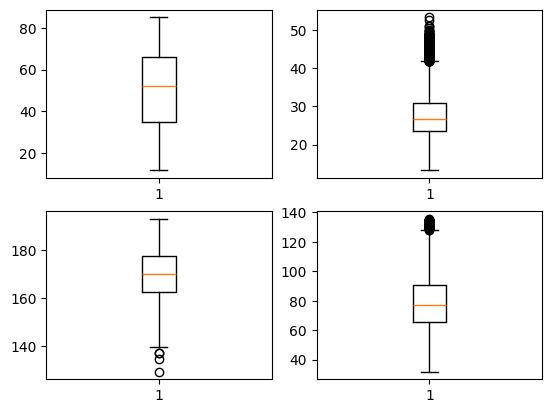

In [64]:
for i,col in enumerate(temp_bmi.columns,start=1):
    plt.subplot(2,2,i)
    plt.boxplot(temp_bmi[col])
plt.show()

In [65]:
temp_bmi.describe()

,AGE,BMI,HEIGHT(cm),WEIGHT(kg)
count,23524.000000,23524.000000,23524.000000,23524.000000
mean,51.019087,27.657832,169.575017,79.773883
std,18.791325,5.524329,9.935051,18.116680
min,12.000000,13.312549,129.540000,31.751440
25%,35.000000,23.627608,162.560000,65.770840
50%,52.000000,26.728731,170.180000,77.110640
75%,66.000000,30.896587,177.800000,90.718400
max,85.000000,53.316066,193.040000,135.624008


In [66]:
temp_2

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,EPHEV,...,HYPMED2,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg)
0,100011,79.0,2.0,1.0,23.594147,1.0,2.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1,157.48,58.513368
2,100061,37.0,2.0,2.0,32.775484,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1,180.34,106.594120
4,100091,75.0,2.0,1.0,22.273536,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,7.0,11.0,3.0,2.0,2.0,1,167.64,62.595696
5,1000101,39.0,2.0,2.0,23.709925,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1,180.34,77.110640
6,1000131,54.0,1.0,2.0,38.273579,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1,165.10,104.326160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,1000555563,19.0,1.0,2.0,20.902530,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2,160.02,53.523856
30305,1000555571,49.0,1.0,1.0,27.438414,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2,167.64,77.110640
30306,1000555601,40.0,2.0,1.0,25.848125,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,1.0,3.0,2.0,2.0,2,172.72,77.110640
30307,1000555621,61.0,2.0,2.0,26.625098,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1,165.10,72.574720


# 3 Target 확인 및 위치 변경 (Target 분리 목적 : y)

In [67]:
# Target 맨 뒤로 옮기기
column_target = temp_2.pop(temp_2.columns[8])
temp_2.insert(24, column_target.name, column_target)

In [68]:
# temp_2.to_csv('temp_save.csv',index=False)

In [69]:
# 인덱스 reset
temp_2 = temp_2.reset_index()
temp_2 = temp_2.drop(['index'],axis=1)

In [70]:
temp_2

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,2.0,1.0,23.594147,1.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,1.0,1,157.48,58.513368,1.0
1,100061,37.0,2.0,2.0,32.775484,1.0,1.0,2.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,2.0,1,180.34,106.594120,2.0
2,100091,75.0,2.0,1.0,22.273536,1.0,1.0,1.0,2.0,1,...,2.0,7.0,11.0,3.0,2.0,2.0,1,167.64,62.595696,2.0
3,1000101,39.0,2.0,2.0,23.709925,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,1.0,2.0,1.0,1,180.34,77.110640,2.0
4,1000131,54.0,1.0,2.0,38.273579,1.0,2.0,1.0,2.0,3,...,2.0,2.0,2.0,3.0,2.0,1.0,1,165.10,104.326160,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1000555563,19.0,1.0,2.0,20.902530,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,2,160.02,53.523856,2.0
23520,1000555571,49.0,1.0,1.0,27.438414,1.0,2.0,1.0,2.0,2,...,2.0,2.0,2.0,3.0,2.0,2.0,2,167.64,77.110640,2.0
23521,1000555601,40.0,2.0,1.0,25.848125,1.0,1.0,1.0,2.0,3,...,1.0,1.0,1.0,3.0,2.0,2.0,2,172.72,77.110640,2.0
23522,1000555621,61.0,2.0,2.0,26.625098,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,1,165.10,72.574720,2.0


In [71]:
# import seaborn as sns
# import pygwalker as pyg

In [72]:
# df = pd.read_csv('temp_save.csv')
# temp_waker = pyg.walk(df)

In [73]:
# 데이터셋 copy
diabetes_final = temp_2.copy()

In [74]:
diabetes_final

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,2.0,1.0,23.594147,1.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,1.0,1,157.48,58.513368,1.0
1,100061,37.0,2.0,2.0,32.775484,1.0,1.0,2.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,2.0,1,180.34,106.594120,2.0
2,100091,75.0,2.0,1.0,22.273536,1.0,1.0,1.0,2.0,1,...,2.0,7.0,11.0,3.0,2.0,2.0,1,167.64,62.595696,2.0
3,1000101,39.0,2.0,2.0,23.709925,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,1.0,2.0,1.0,1,180.34,77.110640,2.0
4,1000131,54.0,1.0,2.0,38.273579,1.0,2.0,1.0,2.0,3,...,2.0,2.0,2.0,3.0,2.0,1.0,1,165.10,104.326160,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1000555563,19.0,1.0,2.0,20.902530,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,2,160.02,53.523856,2.0
23520,1000555571,49.0,1.0,1.0,27.438414,1.0,2.0,1.0,2.0,2,...,2.0,2.0,2.0,3.0,2.0,2.0,2,167.64,77.110640,2.0
23521,1000555601,40.0,2.0,1.0,25.848125,1.0,1.0,1.0,2.0,3,...,1.0,1.0,1.0,3.0,2.0,2.0,2,172.72,77.110640,2.0
23522,1000555621,61.0,2.0,2.0,26.625098,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,1,165.10,72.574720,2.0


# 4 최종 점검 논의 (데이터 이진화 및 변경 [(1,2) → (0,1) 外])

In [75]:
diabetes_final.columns

Index(['id', 'AGE', 'ALCSTAT', 'ARTH1', 'BMI', 'CHLEV', 'CIGAREV2', 'CPLROU',
       'EPHEV', 'FSBALANC', 'GENDER', 'HISPAN_I', 'HYPEV', 'HYPMDEV2',
       'HYPMED2', 'INTIL2W', 'MRACBPI2', 'MRACRPI2', 'REGION', 'SMKSTAT2',
       'TIRED_1', 'PREG', 'HEIGHT(cm)', 'WEIGHT(kg)', 'DIBEV1'],
      dtype='object')

In [76]:
temp_2['PREG'].value_counts()

PREG
1    18391
2     5133
Name: count, dtype: int64

## 4.1 답변값 통일 (0:아니요, 1:예)

In [77]:
# 'DIBEV1' 변경 : 2,7,8,9 → 0(아니오), 1,3 → 1 (예),  8은 데이터가 없음 

diabetes_final['DIBEV1'] = diabetes_final['DIBEV1'].apply(lambda x: 1 if x in(1,3) else 0)

In [78]:
# 0: 아니오, 1: 예로 통일함

change_0 = ['ALCSTAT','ARTH1','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMDEV2','HYPMED2','INTIL2W','SMKSTAT2','TIRED_1','PREG']

for i in change_0:
    diabetes_final[i] = diabetes_final[i].apply(lambda x: x if x == 1.0 else 0)

In [79]:
# pd.set_option('display.max_columns', None)

In [80]:
diabetes_final

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,0.0,1.0,23.594147,1.0,0.0,1.0,0.0,3,...,0.0,1.0,1.0,3.0,0.0,1.0,1,157.48,58.513368,1
1,100061,37.0,0.0,0.0,32.775484,1.0,1.0,0.0,0.0,3,...,0.0,1.0,1.0,3.0,0.0,0.0,1,180.34,106.594120,0
2,100091,75.0,0.0,1.0,22.273536,1.0,1.0,1.0,0.0,1,...,0.0,7.0,11.0,3.0,0.0,0.0,1,167.64,62.595696,0
3,1000101,39.0,0.0,0.0,23.709925,0.0,0.0,1.0,0.0,3,...,0.0,1.0,1.0,1.0,0.0,1.0,1,180.34,77.110640,0
4,1000131,54.0,1.0,0.0,38.273579,1.0,0.0,1.0,0.0,3,...,0.0,2.0,2.0,3.0,0.0,1.0,1,165.10,104.326160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1000555563,19.0,1.0,0.0,20.902530,0.0,0.0,1.0,0.0,3,...,0.0,1.0,1.0,2.0,0.0,0.0,0,160.02,53.523856,0
23520,1000555571,49.0,1.0,1.0,27.438414,1.0,0.0,1.0,0.0,2,...,0.0,2.0,2.0,3.0,0.0,0.0,0,167.64,77.110640,0
23521,1000555601,40.0,0.0,1.0,25.848125,1.0,1.0,1.0,0.0,3,...,1.0,1.0,1.0,3.0,0.0,0.0,0,172.72,77.110640,0
23522,1000555621,61.0,0.0,0.0,26.625098,0.0,0.0,1.0,0.0,3,...,0.0,1.0,1.0,2.0,0.0,0.0,1,165.10,72.574720,0


## 4.2 Age 답변값 통일 (0:아니요, 1:예)

In [81]:
# AGE 이상치 확인
# 85세 이상은 85로 다 합쳐져있음 확인
np.sort(diabetes_final.AGE.unique()) ,diabetes_final.AGE.value_counts(), diabetes_final.GENDER.value_counts()

(array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
        25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
        38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
        51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
        64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
        77., 78., 79., 80., 81., 82., 83., 84., 85.]),
 AGE
 85.0    752
 62.0    448
 61.0    444
 66.0    442
 67.0    441
        ... 
 17.0     76
 14.0     69
 15.0     69
 13.0     67
 12.0     59
 Name: count, Length: 74, dtype: int64,
 GENDER
 2.0    12665
 1.0    10859
 Name: count, dtype: int64)

In [82]:
# 성별 변경 : 1남자, 2여자  → 0남자, 1여자
diabetes_final.GENDER = diabetes_final.GENDER - 1

In [83]:
diabetes_final.GENDER.unique()

array([1., 0.])

In [84]:
# 변경 : 1,2,7 → 0 (아니오), 3,9 → 1(예), 8은 데이터가 없음
diabetes_final['FSBALANC'] = diabetes_final['FSBALANC'].apply(lambda x: 0 if x in(3,9) else 1)

In [85]:
diabetes_final

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,0.0,1.0,23.594147,1.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,3.0,0.0,1.0,1,157.48,58.513368,1
1,100061,37.0,0.0,0.0,32.775484,1.0,1.0,0.0,0.0,0,...,0.0,1.0,1.0,3.0,0.0,0.0,1,180.34,106.594120,0
2,100091,75.0,0.0,1.0,22.273536,1.0,1.0,1.0,0.0,1,...,0.0,7.0,11.0,3.0,0.0,0.0,1,167.64,62.595696,0
3,1000101,39.0,0.0,0.0,23.709925,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,180.34,77.110640,0
4,1000131,54.0,1.0,0.0,38.273579,1.0,0.0,1.0,0.0,0,...,0.0,2.0,2.0,3.0,0.0,1.0,1,165.10,104.326160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1000555563,19.0,1.0,0.0,20.902530,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,2.0,0.0,0.0,0,160.02,53.523856,0
23520,1000555571,49.0,1.0,1.0,27.438414,1.0,0.0,1.0,0.0,1,...,0.0,2.0,2.0,3.0,0.0,0.0,0,167.64,77.110640,0
23521,1000555601,40.0,0.0,1.0,25.848125,1.0,1.0,1.0,0.0,0,...,1.0,1.0,1.0,3.0,0.0,0.0,0,172.72,77.110640,0
23522,1000555621,61.0,0.0,0.0,26.625098,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,2.0,0.0,0.0,1,165.10,72.574720,0


In [86]:
#import seaborn as sns
#import pygwalker as pyg
#df = pd.read_csv('temp_save.csv')
#temp_waker = pyg.walk(df)

# 5. 전처리 파일(CSV) 저장

In [87]:
diabetes_final.to_csv('2.Data_preprocessing.csv',encoding='UTF-8', index=False)